In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn

In [ ]:
df = yf.download('IBM', start="2021-01-01", end="2024-09-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IBM,IBM,IBM,IBM,IBM,IBM
Date,,,,,,
2021-01-04 00:00:00+00:00,98.824799,118.489487,120.382408,117.629066,120.315491,5417443
2021-01-05 00:00:00+00:00,100.578995,120.592735,121.108986,119.130020,119.512428,6395872
2021-01-06 00:00:00+00:00,103.090660,123.604210,126.080307,121.147224,121.319313,8322708
2021-01-07 00:00:00+00:00,102.851448,123.317398,124.722755,122.619499,124.321220,4714740
2021-01-08 00:00:00+00:00,102.484673,122.877632,123.632889,121.395790,122.915871,4891305


In [ ]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22',
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', name='Date', length=921, freq=None)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 921 entries, 2021-01-04 to 2024-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       921 non-null    float64
 1   High       921 non-null    float64
 2   Low        921 non-null    float64
 3   Close      921 non-null    float64
 4   Adj Close  921 non-null    float64
 5   Volume     921 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 50.4 KB
None


<Axes: >

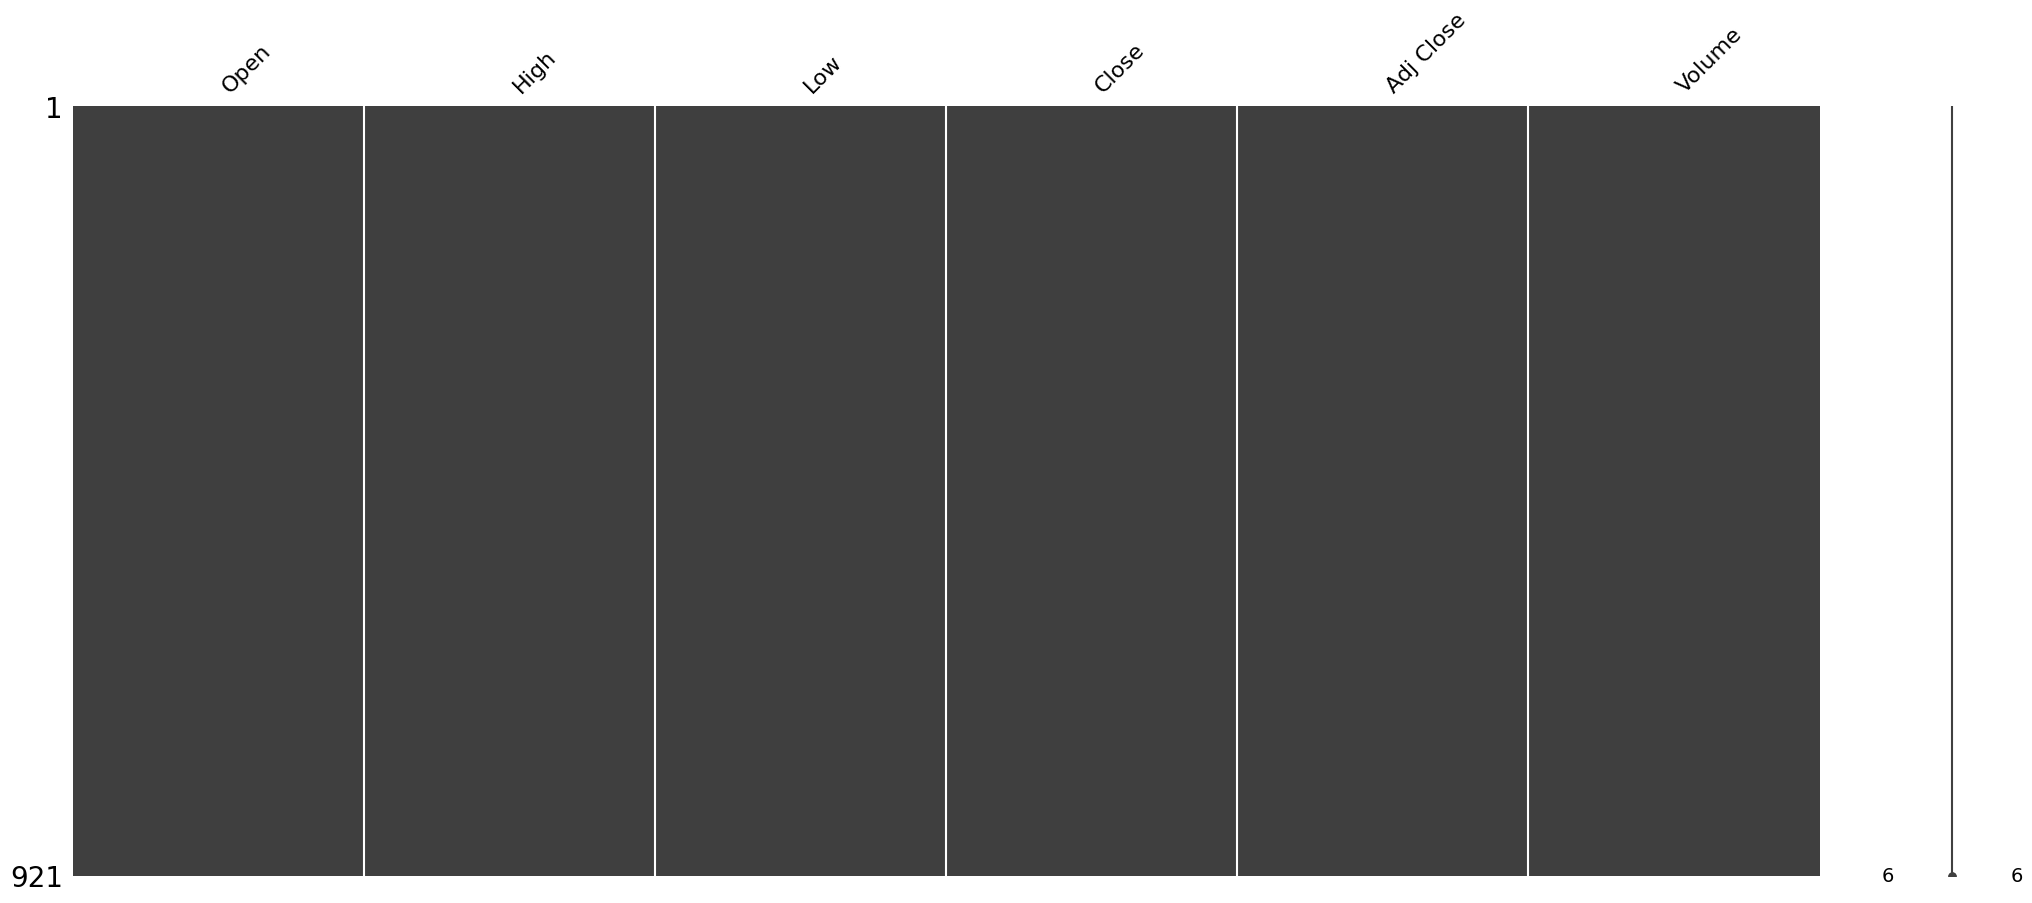

In [ ]:
msgn.matrix(df)

In [ ]:
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,921.000000,921.000000,921.000000,921.000000,921.000000,9.210000e+02
mean,142.350820,143.564013,141.211250,142.436746,131.880579,4.871086e+06
std,20.647555,20.793378,20.515711,20.690185,25.099105,3.091383e+06
min,113.288719,114.282982,112.198853,113.365204,95.296104,1.477100e+06
25%,128.869995,129.740005,127.709999,128.889999,116.024788,3.337100e+06
50%,136.061188,137.369995,135.020004,136.190002,122.418892,4.199400e+06
75%,147.330002,148.100006,146.289993,147.009995,139.532181,5.386400e+06
max,199.300003,202.169998,198.729996,202.130005,202.130005,3.981442e+07


###SMA

In [ ]:
df['SMA'] = df['Close'].rolling(window=20).mean()
print(df[['Close', 'SMA']].tail())

                 Close         SMA
Date                              
2024-08-26  197.979996  192.073000
2024-08-27  198.729996  192.457500
2024-08-28  198.460007  192.773501
2024-08-29  198.899994  193.235500
2024-08-30  202.130005  193.886001


###EMA

In [ ]:
df['EMA'] = df['Close'].ewm(span=20, adjust=False).mean()
print(df[['Close', 'EMA']].tail())

                 Close         EMA
Date                              
2024-08-26  197.979996  192.356107
2024-08-27  198.729996  192.963144
2024-08-28  198.460007  193.486655
2024-08-29  198.899994  194.002211
2024-08-30  202.130005  194.776286


### Смуги Боллінджера

In [ ]:
df['STD'] = df['Close'].rolling(window=20).std()
df['Upper_boundary'] = df['SMA'] + (2 * df['STD'])
df['Lower_boundary'] = df['SMA'] - (2 * df['STD'])

print(df[['Close', 'SMA', 'Upper_boundary', 'Lower_boundary']].tail())

                 Close         SMA  Upper_boundary  Lower_boundary
Date                                                              
2024-08-26  197.979996  192.073000      199.728877      184.417124
2024-08-27  198.729996  192.457500      200.648648      184.266353
2024-08-28  198.460007  192.773501      201.389678      184.157323
2024-08-29  198.899994  193.235500      202.134987      184.336013
2024-08-30  202.130005  193.886001      203.399603      184.372399


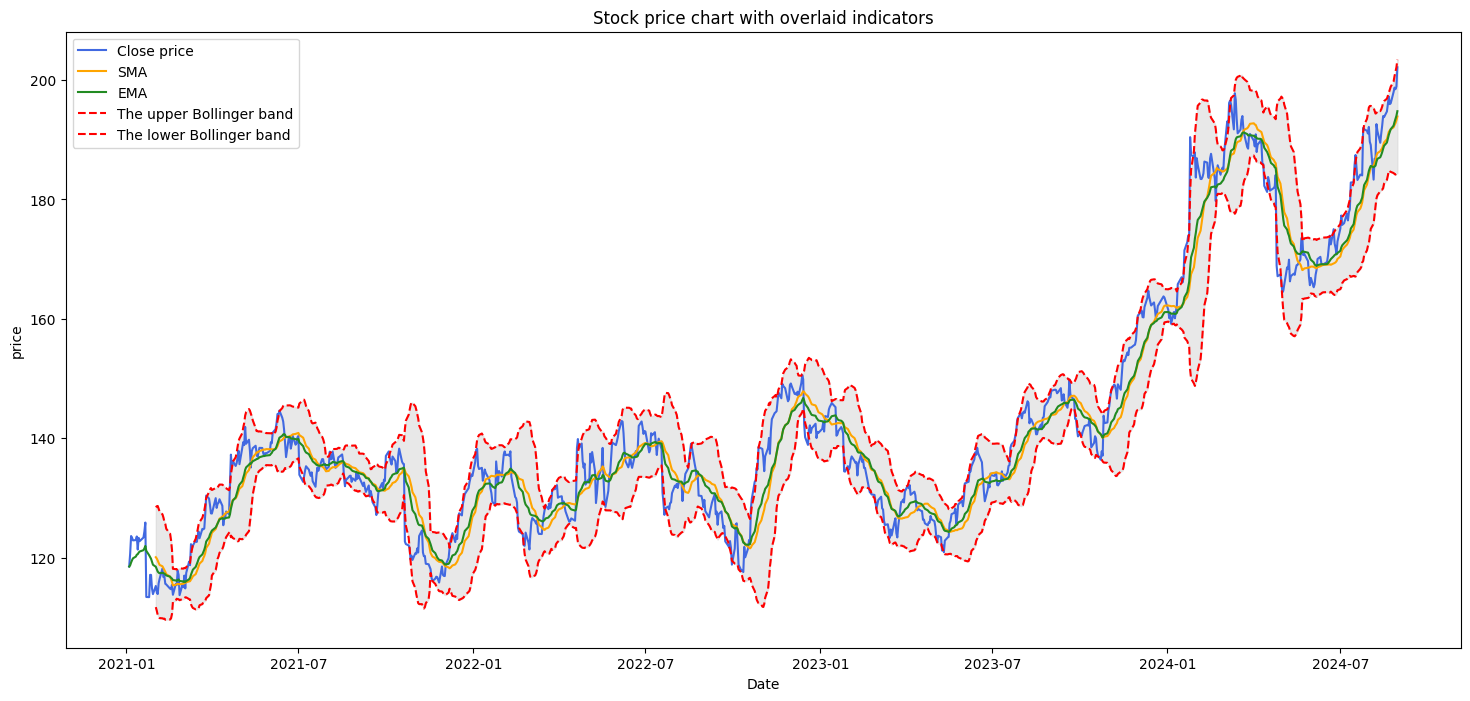

In [ ]:
plt.figure(figsize=(18, 8))

plt.plot(df['Close'], label='Close price', color='#4169E1')
plt.plot(df['SMA'], label='SMA', color='#FFA500')
plt.plot(df['EMA'], label='EMA', color='#228B22')
plt.plot(df['Upper_boundary'], label='The upper Bollinger band', color='red', linestyle='--')
plt.plot(df['Lower_boundary'], label='The lower Bollinger band', color='red', linestyle='--')
plt.fill_between(df.index, df['Lower_boundary'], df['Upper_boundary'], color='lightgray', alpha=0.5)

plt.title('Stock price chart with overlaid indicators')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()

plt.show()

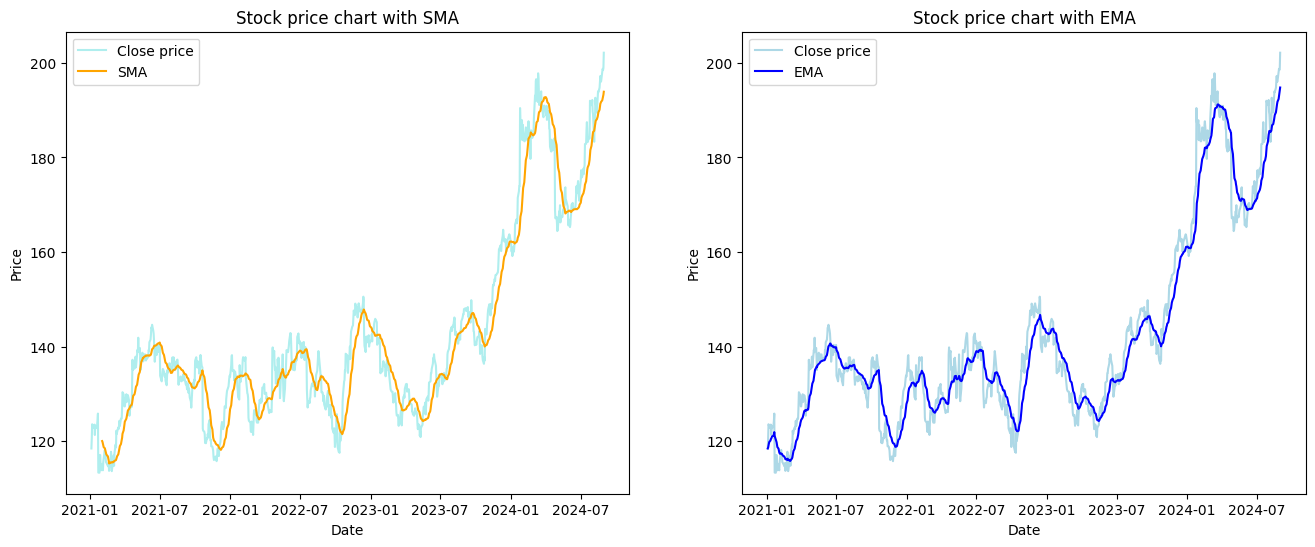

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.title('Stock price chart with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('price')
axs[0].plot(df['Close'], label='Close price', color='#AFEEEE')
axs[0].plot(df['SMA'], label='SMA', color='orange')
axs[0].set_title('Stock price chart with SMA')

axs[1].plot(df['Close'], label='Close price', color='#ADD8E6')
axs[1].plot(df['EMA'], label='EMA', color='#0000FF')
axs[1].set_title('Stock price chart with EMA')
for ax in axs:
  ax.legend(loc='best')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

plt.show()

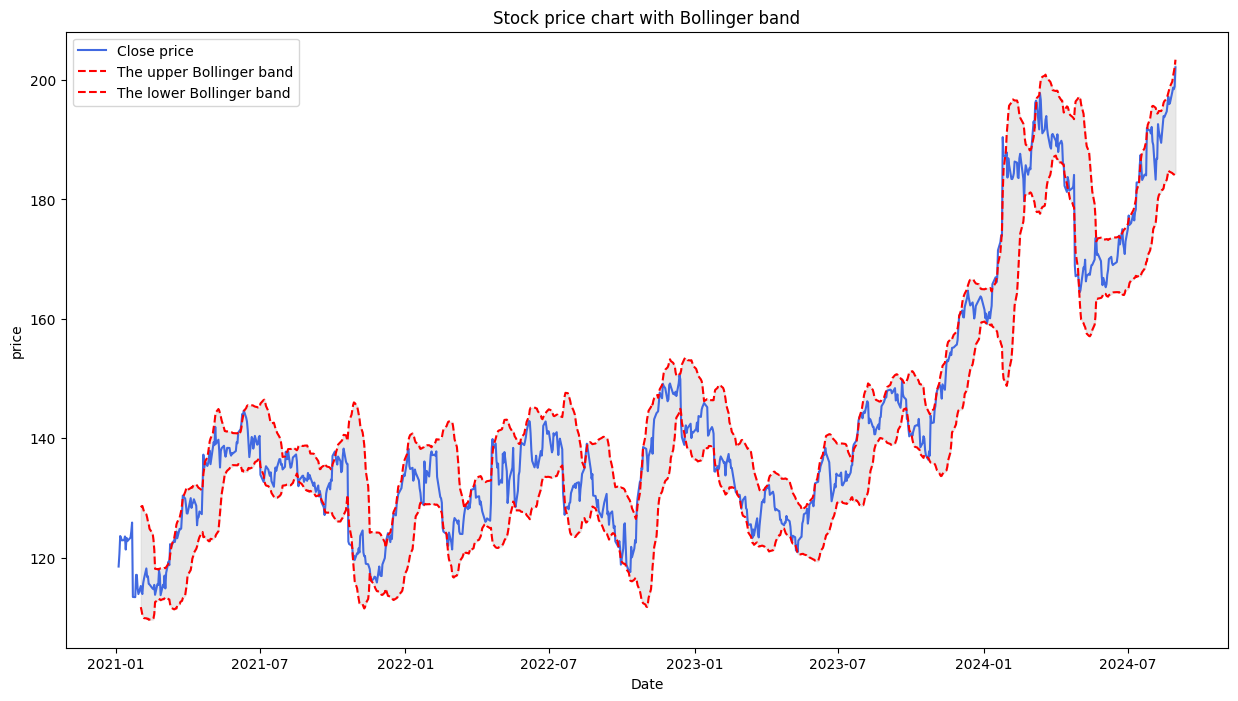

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(df['Close'], label='Close price', color='#4169E1')
plt.plot(df['Upper_boundary'], label='The upper Bollinger band', color='red', linestyle='--')
plt.plot(df['Lower_boundary'], label='The lower Bollinger band', color='red', linestyle='--')
plt.fill_between(df.index, df['Lower_boundary'], df['Upper_boundary'],  color='lightgray', alpha=0.5)
plt.title('Stock price chart with Bollinger band')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()

plt.show()

# Торгові сигнали

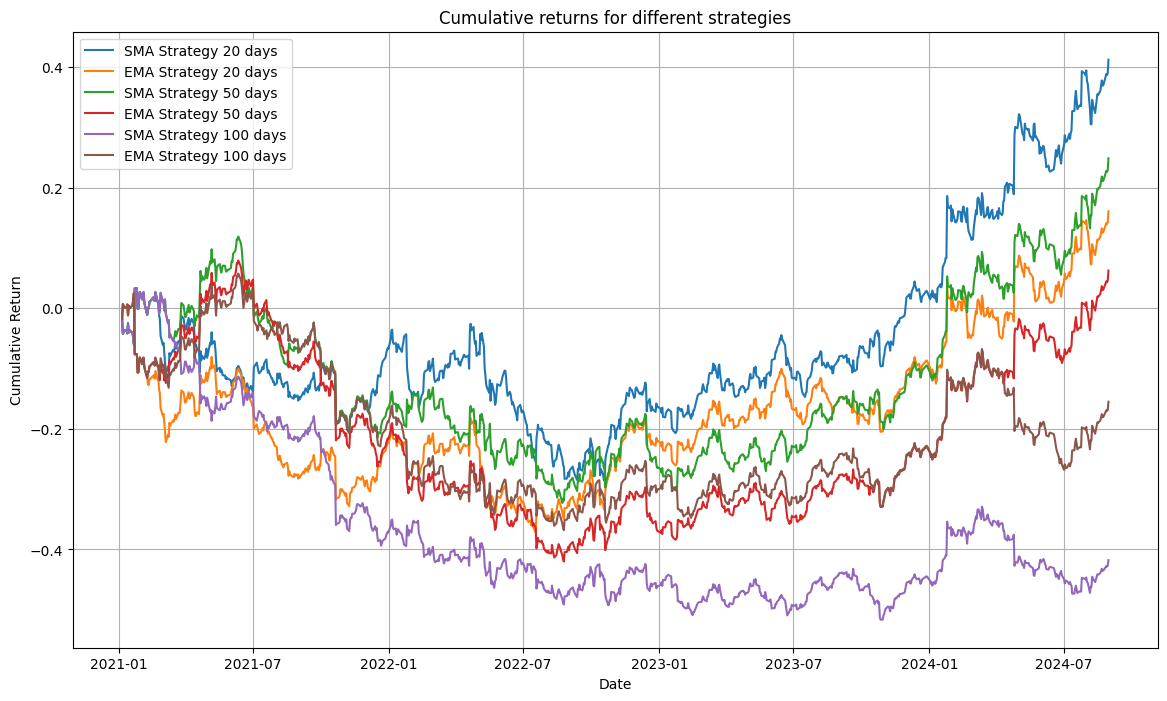

In [ ]:
def trading_signals(data, period):
    data[f'SMA_{period}'] = data['Close'].rolling(window=period).mean()
    data[f'EMA_{period}'] = data['Close'].ewm(span=period, adjust=False).mean()
    data['Signal_SMA'] = 0
    data['Signal_SMA'] = np.where(data['Close'] > data[f'SMA_{period}'], 1, -1)

    data['Signal_EMA'] = 0
    data['Signal_EMA'] = np.where(data['Close'] > data[f'EMA_{period}'], 1, -1)

    return data

periods = [20, 50, 100]
results = {}

for period in periods:
    data = trading_signals(df, period)

    data[f'Position_SMA_{period}'] = data['Signal_SMA'].shift(1)
    data[f'Position_EMA_{period}'] = data['Signal_EMA'].shift(1)
    data['Daily_Return'] = data['Close'].pct_change()

    data[f'Strategy_Return_SMA_{period}'] = data['Daily_Return'] * data[f'Position_SMA_{period}']
    data[f'Strategy_Return_EMA_{period}'] = data['Daily_Return'] * data[f'Position_EMA_{period}']

    data[f'Cumulative_Return_SMA_{period}'] = (1 + data[f'Strategy_Return_SMA_{period}']).cumprod() - 1
    data[f'Cumulative_Return_EMA_{period}'] = (1 + data[f'Strategy_Return_EMA_{period}']).cumprod() - 1


    results[period] = data[[f'Cumulative_Return_SMA_{period}', f'Cumulative_Return_EMA_{period}', 'Buy_Hold_Return']].copy()


plt.figure(figsize=(14, 8))

for period in periods:
    plt.plot(data.index, data[f'Cumulative_Return_SMA_{period}'], label=f'SMA Strategy {period} days')
    plt.plot(data.index, data[f'Cumulative_Return_EMA_{period}'], label=f'EMA Strategy {period} days')


plt.title(f'Cumulative returns for different strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
sma_max_dds={}
ema_max_dds={}

def max_drawdown(cumulative_returns):
    rolling_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / rolling_max - 1
    return drawdown.min()

for period in periods:
    sma_max_dd = max_drawdown(data[f'Cumulative_Return_SMA_{period}'])
    sma_max_dds[f'{period}']= sma_max_dd
    print(f"Max Drawdown for SMA {period} days: {sma_max_dd:.4f}")

    ema_max_dd = max_drawdown(data[f'Cumulative_Return_EMA_{period}'])
    ema_max_dds[f'{period}']= ema_max_dd
    print(f"Max Drawdown for EMA {period} days: {ema_max_dd:.4f}")

Max Drawdown for SMA 20 days: -9.6657
Max Drawdown for EMA 20 days: -15.7941
Max Drawdown for SMA 50 days: -3.7152
Max Drawdown for EMA 50 days: -6.3105
Max Drawdown for SMA 100 days: -16.6200
Max Drawdown for EMA 100 days: -7.4027


<Figure size 640x480 with 0 Axes>

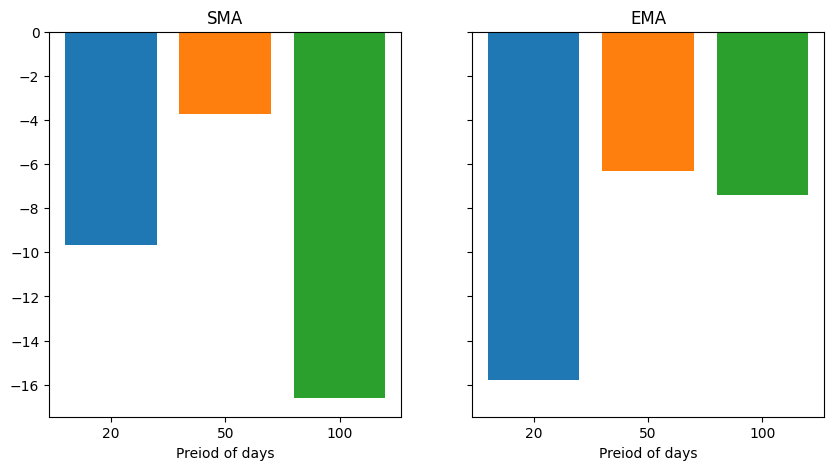

In [ ]:
plt.set_cmap('rocket')
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for name, item in sma_max_dds.items():
  axs[0].bar(name, item)
  axs[0].set_title("SMA")

for name, item in ema_max_dds.items():
  axs[1].bar(name, item)
  axs[1].set_title("EMA")

for ax in axs:
  ax.set_xlabel("Preiod of days")
plt.show()

In [ ]:
sma_sharpes={}
ema_sharpes={}
def sharpe_ratio(daily_returns, risk_free_rate=0):
    mean_return = daily_returns.mean()
    volatility = daily_returns.std()
    sharpe = (mean_return - risk_free_rate) / volatility
    return sharpe

print('\t Sharpe Ratio')
for period in periods:
    sma_sharpe = sharpe_ratio(data[f'Strategy_Return_SMA_{period}'])
    sma_sharpes[f'{period}']= sma_sharpe
    print(f"SMA {period} days: {sma_sharpe:.4f}")

    ema_sharpe = sharpe_ratio(data[f'Strategy_Return_EMA_{period}'])
    ema_sharpes[f'{period}']= ema_sharpe
    print(f"EMA {period} days: {ema_sharpe:.4f}")


	 Sharpe Ratio
SMA 20 days: 0.0340
EMA 20 days: 0.0186
SMA 50 days: 0.0243
EMA 50 days: 0.0117
SMA 100 days: -0.0357
EMA 100 days: -0.0063


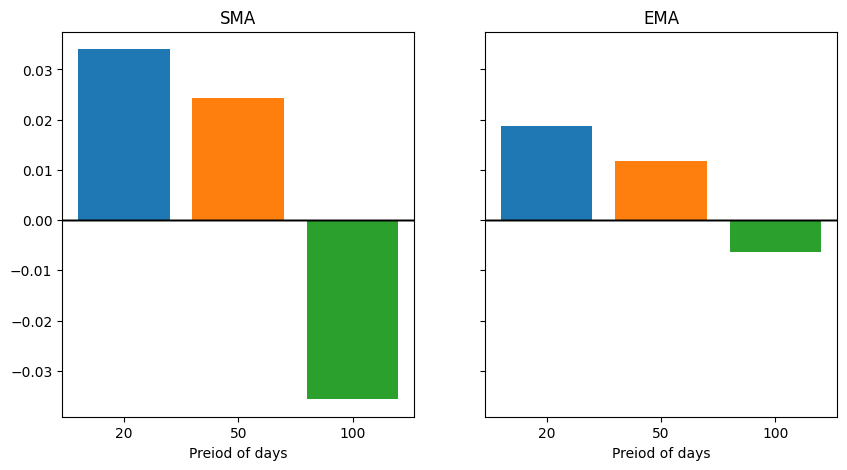

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for name, item in sma_sharpes.items():
  axs[0].bar(name, item)
  axs[0].axhline(y=0, color='black', linewidth=1)
  axs[0].set_title("SMA")

for name, item in ema_sharpes.items():
  axs[1].bar(name, item)
  axs[1].axhline(y=0, color='black', linewidth=1)
  axs[1].set_title("EMA")

for ax in axs:
  ax.set_xlabel("Preiod of days")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for period in periods:
  df['Signal'] = 0
  df['Signal'][period:] = np.where(df['Close'][period:] < df['Lower_boundary'][period:], 1, 0)
  df['Signal'][period:] = np.where(df['Close'][period:] > df['Upper_boundary'][period:], -1, df['Signal'][period:])
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')

  initial_capital = 10
  df['Returns'] = df['Close'].pct_change()
  df['Strategy'] = df['Returns'] * df['Position'].shift(1)
  df['Portfolio Value'] = initial_capital * (1 + df['Strategy']).cumprod()
  returns = df['Portfolio Value'].pct_change().dropna()

  cumulative_return = (df['Portfolio Value'].iloc[-1] - initial_capital) / initial_capital
  max_drawdown = (df['Portfolio Value'].cummax() - df['Portfolio Value']).max()
  sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

  print(f'\t Period:')
  print(f"Cumulative Return: {cumulative_return}")
  print(f"Maximum Drawdown: {max_drawdown:.2f}")
  print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

	 Period:
Cumulative Return: -0.2276532256548128
Maximum Drawdown: 5.17
Sharpe Ratio: -0.24
	 Period:
Cumulative Return: -0.15408068169709105
Maximum Drawdown: 5.66
Sharpe Ratio: -0.12
	 Period:
Cumulative Return: -0.07794644832042899
Maximum Drawdown: 6.17
Sharpe Ratio: -0.01


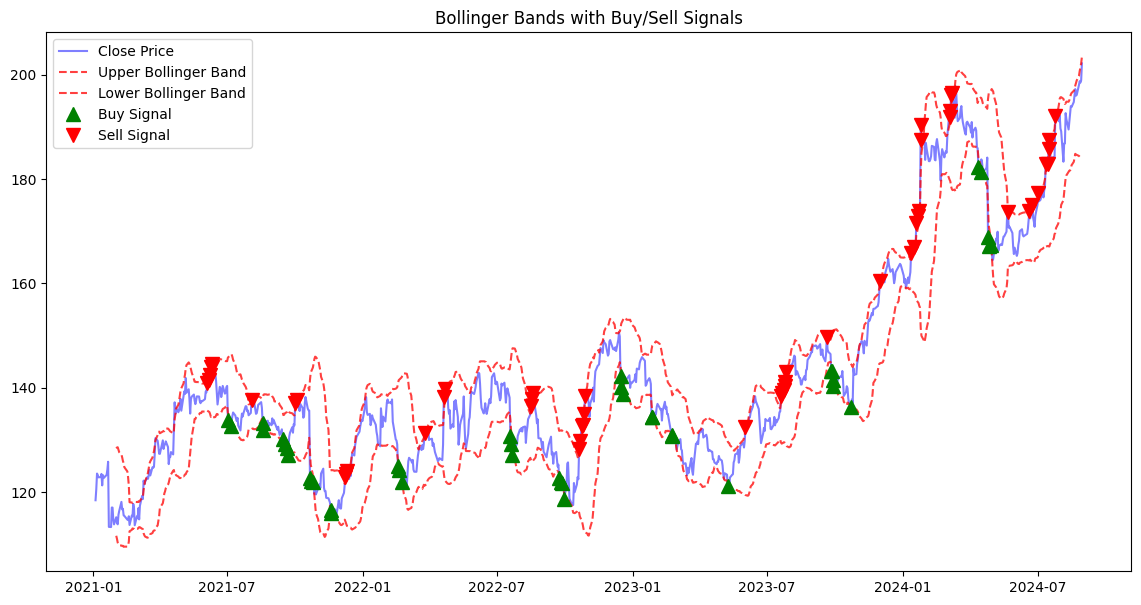

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['Upper_boundary'], label='Upper Bollinger Band', color='red', linestyle='--', alpha=0.75)
plt.plot(df['Lower_boundary'], label='Lower Bollinger Band', color='red', linestyle='--', alpha=0.75)

plt.plot(df[df['Signal'] == 1].index, df['Close'][df['Signal'] == 1], '^', markersize=10, color='green', label='Buy Signal')
plt.plot(df[df['Signal'] == -1].index, df['Close'][df['Signal'] == -1], 'v', markersize=10, color='red', label='Sell Signal')

plt.title('Bollinger Bands with Buy/Sell Signals')
plt.legend()
plt.show()